In [10]:
import tensorflow as tf
import keras
from tensorflow.keras.models import load_model
import numpy as np

import keras

train_path = '/Users/julio/Documentos-Local/data/VinDr-Mammo/subsets/ss1/training'
test_path = '/Users/julio/Documentos-Local/data/VinDr-Mammo/subsets/ss1/test'

train_ds = keras.utils.image_dataset_from_directory(
    directory=train_path,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(299, 299),
    color_mode='grayscale'
)

tests_ds = keras.utils.image_dataset_from_directory(
    directory=test_path,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(299, 299),
    color_mode='grayscale'
)

from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom

# Agregar capas de augmentación dentro del modelo
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2)
])

# Normalizar los datos dentro del modelo
normalization_layer = Rescaling(1./255)

# Aplicar augmentación y normalización en el flujo del modelo
augmented_train_dataset = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y))

normalized_train_dataset = augmented_train_dataset.map(
    lambda x, y: (normalization_layer(x), y))

normalized_test_dataset = tests_ds.map(
    lambda x, y: (normalization_layer(x), y))

Found 815 files belonging to 2 classes.
Found 192 files belonging to 2 classes.


In [11]:
# Cargar el modelo guardado
model = load_model('weights/model_1.0.0.35_complete.keras', compile=False)

In [12]:
# Iterar sobre las capas del modelo
for layer in model.layers:
    #print(f"Capa: {layer.name}")
    if not layer.get_weights():
        print(f"Capa: {layer.name} -> No se cargaron pesos")
        

Capa: relu1 -> No se cargaron pesos
Capa: relu1.1 -> No se cargaron pesos
Capa: relu1.2 -> No se cargaron pesos
Capa: pool1 -> No se cargaron pesos
Capa: dropout -> No se cargaron pesos
Capa: relu2.1 -> No se cargaron pesos
Capa: relu2.2 -> No se cargaron pesos
Capa: pool2 -> No se cargaron pesos
Capa: dropout_1 -> No se cargaron pesos
Capa: relu3.1 -> No se cargaron pesos
Capa: relu3.2 -> No se cargaron pesos
Capa: pool3 -> No se cargaron pesos
Capa: dropout_2 -> No se cargaron pesos
Capa: relu4 -> No se cargaron pesos
Capa: pool4 -> No se cargaron pesos
Capa: dropout_3 -> No se cargaron pesos
Capa: relu5 -> No se cargaron pesos
Capa: pool5 -> No se cargaron pesos
Capa: dropout_4 -> No se cargaron pesos
Capa: flatten -> No se cargaron pesos
Capa: dropout_5 -> No se cargaron pesos
Capa: fc1_relu -> No se cargaron pesos
Capa: dropout_6 -> No se cargaron pesos
Capa: fc2_relu -> No se cargaron pesos
Capa: dropout_7 -> No se cargaron pesos


In [13]:
# Congelar todas las capas convolucionales (hasta Flatten)
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False

print("Capas convolucionales congeladas.")
for layer in model.layers:
    print(f"Capa: {layer.name} - ¿Entrenable?: {layer.trainable}")

Capas convolucionales congeladas.
Capa: conv1 - ¿Entrenable?: False
Capa: bn1 - ¿Entrenable?: False
Capa: relu1 - ¿Entrenable?: True
Capa: conv1.1 - ¿Entrenable?: False
Capa: bn1.1 - ¿Entrenable?: False
Capa: relu1.1 - ¿Entrenable?: True
Capa: conv1.2 - ¿Entrenable?: False
Capa: bn1.2 - ¿Entrenable?: False
Capa: relu1.2 - ¿Entrenable?: True
Capa: pool1 - ¿Entrenable?: False
Capa: dropout - ¿Entrenable?: True
Capa: conv2.1 - ¿Entrenable?: False
Capa: bn2.1 - ¿Entrenable?: False
Capa: relu2.1 - ¿Entrenable?: True
Capa: conv2.2 - ¿Entrenable?: False
Capa: bn2.2 - ¿Entrenable?: False
Capa: relu2.2 - ¿Entrenable?: True
Capa: pool2 - ¿Entrenable?: False
Capa: dropout_1 - ¿Entrenable?: True
Capa: conv3.1 - ¿Entrenable?: False
Capa: bn3.1 - ¿Entrenable?: False
Capa: relu3.1 - ¿Entrenable?: True
Capa: conv3.2 - ¿Entrenable?: False
Capa: bn3.2 - ¿Entrenable?: False
Capa: relu3.2 - ¿Entrenable?: True
Capa: pool3 - ¿Entrenable?: False
Capa: dropout_2 - ¿Entrenable?: True
Capa: conv4 - ¿Entrenable?

In [14]:
# Compilar el modelo con un optimizador y función de pérdida adecuados
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy', 'recall', 'precision'])

In [16]:
# Entrenar el modelo congelando las capas convolucionales
history = model.fit(
    normalized_train_dataset,
    validation_data=normalized_test_dataset,
    epochs=20
)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7276 - loss: 0.9119 - precision: 0.7276 - recall: 0.7276 - val_accuracy: 0.7396 - val_loss: 0.7702 - val_precision: 0.7396 - val_recall: 0.7396
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.7656 - loss: 0.7550 - precision: 0.7656 - recall: 0.7656 - val_accuracy: 0.7396 - val_loss: 0.7021 - val_precision: 0.7396 - val_recall: 0.7396
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7563 - loss: 0.6979 - precision: 0.7563 - recall: 0.7563 - val_accuracy: 0.7396 - val_loss: 0.6855 - val_precision: 0.7396 - val_recall: 0.7396
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7697 - loss: 0.6569 - precision: 0.7697 - recall: 0.7697 - val_accuracy: 0.7396 - val_loss: 0.6726 - val_precision: 0.7396 - val_recall: 0.7396
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.7579 - loss: 0.6683 - precision: 0.7579 - recall: 0.7579 - val_accuracy: 0.7396 - val_loss: 0.6648

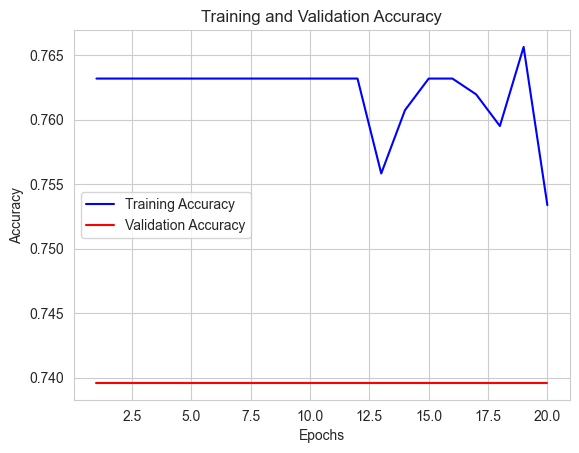

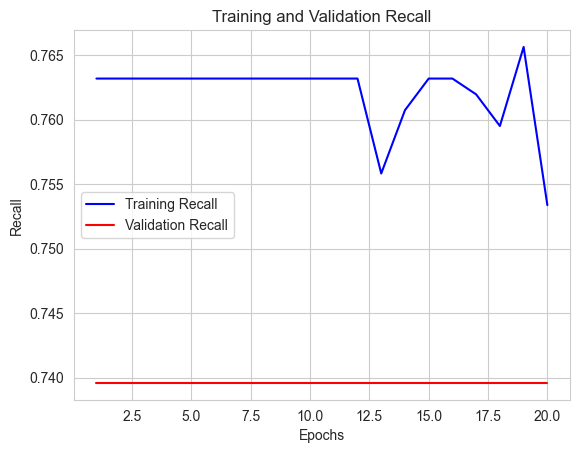

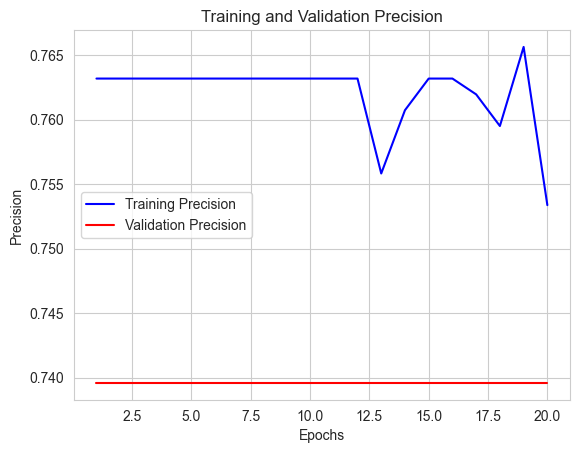

In [17]:
import matplotlib.pyplot as plt

# Obtener las métricas del historial de entrenamiento
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
recall = history.history['recall']
val_recall = history.history['val_recall']
precision = history.history['precision']
val_precision = history.history['val_precision']

epochs = range(1, len(accuracy) + 1)

# Gráfico de Accuracy
plt.figure()
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de Recall
plt.figure()
plt.plot(epochs, recall, 'b', label='Training Recall')
plt.plot(epochs, val_recall, 'r', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# Gráfico de Precision
plt.figure()
plt.plot(epochs, precision, 'b', label='Training Precision')
plt.plot(epochs, val_precision, 'r', label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Mostrar los gráficos
plt.show()

In [25]:
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np

# Obtenemos las probabilidades predichas
y_pred_proba = model.predict(normalized_test_dataset)

# Convertimos probabilidades a clases (para clasificación binaria con un umbral de 0.5)
# O usamos np.argmax si es clasificación multiclase
y_pred = np.argmax(y_pred_proba, axis=1)

# Asegúrate de que las etiquetas verdaderas (y_true) están en formato correcto
y_true = np.concatenate([y for x, y in normalized_test_dataset], axis=0)

# Si y_true está en formato one-hot (indicador binario), lo convertimos a una clase usando np.argmax
if len(y_true.shape) > 1:
    y_true = np.argmax(y_true, axis=1)

# Ahora calculamos las métricas
f1 = f1_score(y_true, y_pred, average='weighted')  # Puedes usar 'micro', 'macro', o 'weighted' según lo necesites
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f"F1-Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
F1-Score: 0.6288672654690619
Precision: 0.5469835069444445
Recall: 0.7395833333333334


2024-09-13 13:47:53.469434: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/Users/julio/Documents/PMM/Codigos/Test1/Classification/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


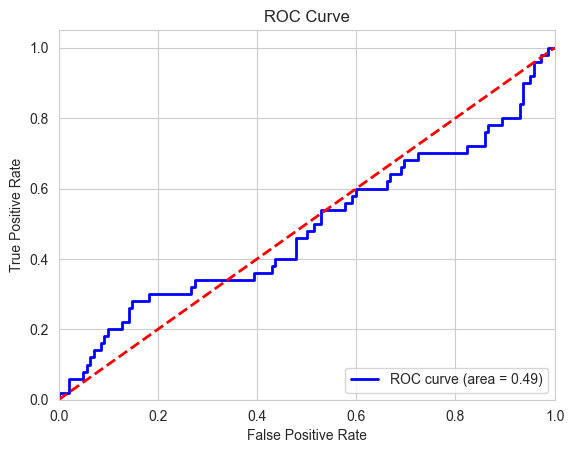

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = model.predict(normalized_test_dataset)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)
 
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()